## Template Matching

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

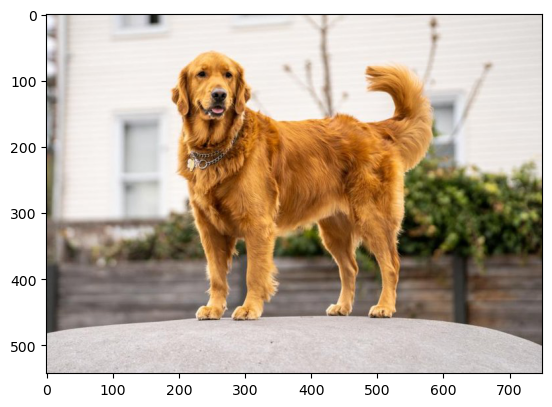

In [2]:
full_image = cv2.imread('../../img/full_dog.jpeg')
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
plt.imshow(full_image)
plt.show()

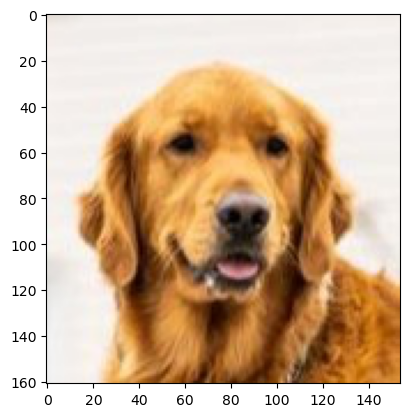

In [3]:
face = cv2.imread('../../img/tm_dog.jpeg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)
plt.show()

In [4]:
print("full image shape : ", full_image.shape)
print("dog face shape : ", face.shape)

full image shape :  (543, 750, 3)
dog face shape :  (161, 154, 3)


### EVAL Function

In [5]:
# Eval function we will pass the string of built in function to a variable and it will automatically being called if we used that variable 
# we will use this more often

# sum is a built in method of python
a = sum([1,2,3])
print("sum : ",  a) # 6

my_sum_func = eval('sum')
print('sum by my function : ', my_sum_func([1,2,3]))

sum :  6
sum by my function :  6


### Loading all different Comparison method 

In [6]:
# Note: now we will store it as string and using eval function we will convert it as method
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

### How it works a sample template matching comparison

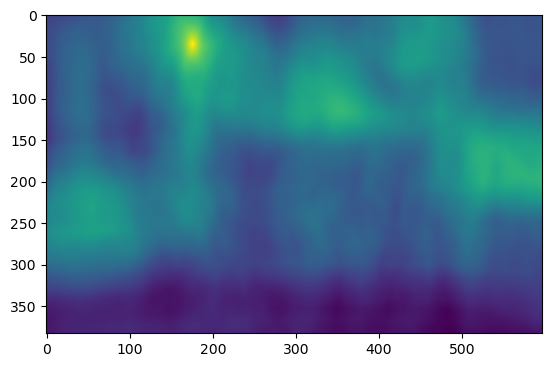

In [7]:
# We have to compare the images with different comparison methods. Below we used TM_CCOEFF to compare images.
# The resultant image will shows the head map of the compared image. 
# In the heat map image, we will see a yellowish circle that where the two images are matched exactly.
# using the points we will draw a rectangle around the match.
resultant_heatmap_image = cv2.matchTemplate(full_image, face, eval(methods[0]))
plt.imshow(resultant_heatmap_image)
plt.show()

### Implemetation

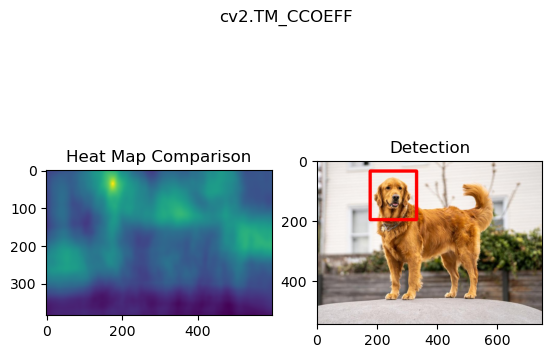

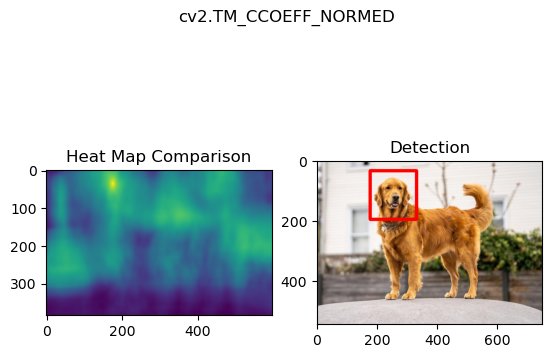

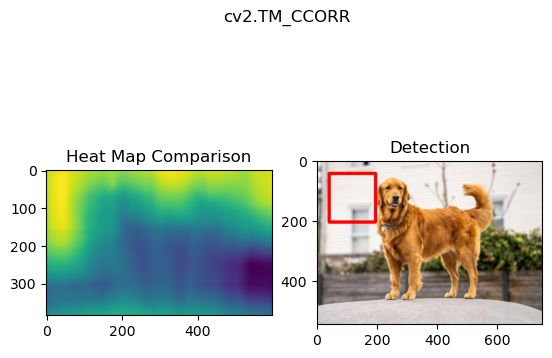

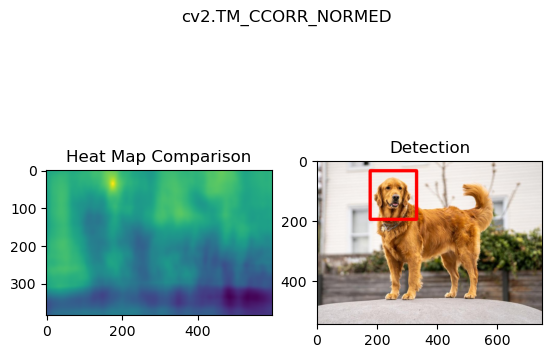

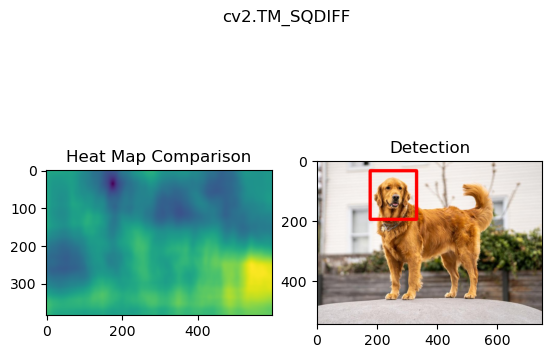

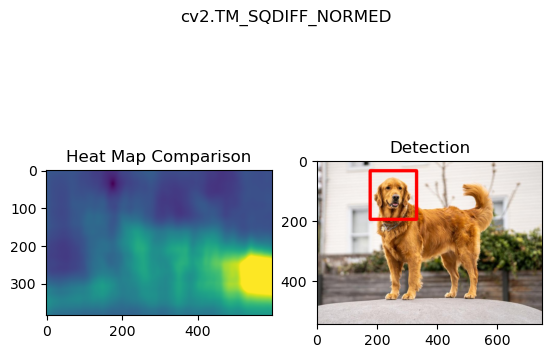

In [9]:
# # we are going to draw a rectangle if we found the copy of the image 
for m in methods:

    # create a copy of image
    full_copy = full_image.copy()

    method = eval(m)

    # Template matching
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # TOP LEFT CORNER of the rectangle
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # min_loc/max_loc in Tuple : (x,y)
    else:
        top_left = max_loc
    
    height, width, cc = face.shape

    # BOTTOM RIGHT CORNER
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)

    # PLOT and Shows image
    plt.subplot(121) # means get one row and two columns and show the images side by side. the last digit to grabs either 1 or 2
    plt.title('Heat Map Comparison')
    plt.imshow(res)
   
    plt.subplot(122)
    plt.title('Detection')
    plt.suptitle(m)
    plt.imshow(full_copy)

    plt.show()
    